# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Parametrage regression logistique

---

## Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns

### Chargement des données

In [5]:
recueil_filename = 'data/imports/221025-RecueilBrut.csv'

In [6]:
df_brut = pd.read_csv(recueil_filename)

In [7]:
df_brut = df_brut.drop_duplicates('url')

In [8]:
df_brut

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signé,...,inversion de la preuve,invérifiable,titre décalé,dénigrement,cherry picking,degré infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné)
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,non,non,...,non,non,non,non,NaN,NaN,FB,NaN,NaN,NaN
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,oui,non,...,non,oui,non,non,NaN,1.0,FB,NaN,NaN,NaN
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,non,non,...,non,non,non,non,non,NaN,FB,NaN,NaN,NaN
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,oui,non,...,non,non,non,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,oui,non,...,non,oui,oui,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,non,non,...,non,non,non,non,NaN,NaN,CN,NaN,NaN,NaN
496,38.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,oui,non,...,oui,oui,non,oui,NaN,1.0,FB,NaN,NaN,NaN
497,38.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",oui,non,...,non,non,oui,non,NaN,1.0,FB,NaN,NaN,NaN
498,38.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,oui,non,...,non,non,non,non,NaN,2.0,FB,NaN,NaN,NaN


### Mise en forme des labels

In [9]:
import patat.imp.labels

In [10]:
df_recueil = df_brut.rename(columns = patat.imp.labels.label_translator)

In [11]:
import urllib
def get_site(url):
    if type(url)==str:
        return urllib.parse.urlsplit(url).netloc

df_recueil.loc[:,'site'] = df_recueil['url'].apply(get_site)

In [12]:
df_recueil.value_counts('site')

site
www.francesoir.fr                     114
www.breizh-info.com                    48
lesmoutonsrebelles.com                 40
www.wikistrike.com                     39
lezarceleurs.blogspot.com              32
lesdeqodeurs.fr                        24
lemediaen442.fr                        20
www.dreuz.info                         16
www.profession-gendarme.com            15
fr.sott.net                            15
www.mondialisation.ca                  14
www.polemia.com                        12
reseauinternational.net                11
www.lelibrepenseur.org                 11
www.nouvelordremondial.cc              10
www.lesalonbeige.fr                     9
www.voltairenet.org                     9
lecourrier-du-soir.com                  6
www.les-crises.fr                       5
lesobservateurs.ch                      5
www.preuvesduparanormal.fr              5
lesakerfrancophone.fr                   5
infodujour.fr                           4
www.cnews.fr                 

In [13]:
import numpy as np

def normalize_label(value):
    if type(value) != str:
        return np.NaN
    elif value == 'oui':
        return 1.0
    elif value =='non' :
        return 0.0
    else:
        return np.NaN

In [14]:
df_recueil=df_recueil.rename(columns=patat.imp.labels.label_translator)

In [15]:
df_recueil.keys()

Index(['# site', '# article', 'Site', 'url', 'Auteur/trice', 'Date', 'Titre',
       'Explication (pour les infox seulement)', 'infox', 'signe',
       'entites_nommees', 'entites_coherentes', 'ouverture_esprit',
       'qualite_ecriture', 'intention', 'faits', 'opinions', 'propos_raportes',
       'sources_citees', 'fausse_nouvelle', 'insinuations', 'exageration',
       'scientifique_sulfureux', 'trop_mots', 'trop_chiffres', 'sophisme',
       'inversion_preuve', 'inverifiable', 'titre_decale', 'denigrement',
       'cherry_picking', 'degre_infox', 'observateur', 'thème (abandonné)',
       'type infox (abandonné)', 'Date de collection (abandonné)', 'site'],
      dtype='object')

In [16]:
for label in patat.imp.labels.short_label_names:
    df_recueil[label]=df_recueil[label].apply(normalize_label)

#df_recueil = df_recueil.convert_dtypes()

for label in patat.imp.labels.short_label_names:
    print(label,df_recueil[label].isna().sum())

infox 1
signe 1
entites_nommees 0
entites_coherentes 0
ouverture_esprit 1
qualite_ecriture 2
faits 0
opinions 0
fausse_nouvelle 1
insinuations 2
exageration 256
scientifique_sulfureux 2
trop_mots 1
trop_chiffres 1
sophisme 1
inversion_preuve 1
inverifiable 1
propos_raportes 1
sources_citees 1
titre_decale 1
denigrement 346
cherry_picking 470


In [17]:
df_recueil

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signe,...,inverifiable,titre_decale,denigrement,cherry_picking,degre_infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné),site
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,1.0,0.0,...,1.0,0.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.anguillesousroche.com
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,1.0,0.0,...,0.0,0.0,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22,bonsens.info
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,1.0,0.0,...,1.0,1.0,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22,www.breizh-info.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,CN,NaN,NaN,NaN,www.wikistrike.com
496,38.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,1.0,0.0,...,1.0,0.0,1.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com
497,38.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",1.0,0.0,...,0.0,1.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com
498,38.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,1.0,0.0,...,0.0,0.0,0.0,NaN,2.0,FB,NaN,NaN,NaN,www.wikistrike.com


### Chargement articles

In [18]:
from patat.imp.importer import Importer
from patat.imp.parser import Parser

In [19]:
imp = Importer()
parser = Parser()

In [20]:
df_recueil['html']=df_recueil['url'].apply(imp.get_webpage)

In [21]:
df_recueil = df_recueil[df_recueil['html']!='']

In [22]:
df_recueil

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signe,...,titre_decale,denigrement,cherry_picking,degre_infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné),site,html
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com,"<!DOCTYPE html>\n<html class=""no-js"" lang=""fr-..."
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,1.0,0.0,...,0.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.anguillesousroche.com,"<!DOCTYPE html>\n<html class=""no-js"" lang=""fr-..."
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com,"<!DOCTYPE html>\n<html class=""no-js"" lang=""fr-..."
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,1.0,0.0,...,0.0,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22,bonsens.info,"<!DOCTYPE html>\n<html lang=""fr-FR"">\n<head>\n..."
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,1.0,0.0,...,1.0,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22,www.breizh-info.com,"<!doctype html>\n<html lang=""fr-FR"" prefix=""og..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,CN,NaN,NaN,NaN,www.wikistrike.com,"<!doctype html>\n<html lang=""fr"">\n <head> ..."
496,38.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,1.0,0.0,...,0.0,1.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com,"<!doctype html>\n<html lang=""fr"">\n <head> ..."
497,38.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",1.0,0.0,...,1.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com,"<!doctype html>\n<html lang=""fr"">\n <head> ..."
498,38.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,1.0,0.0,...,0.0,0.0,NaN,2.0,FB,NaN,NaN,NaN,www.wikistrike.com,"<!doctype html>\n<html lang=""fr"">\n <head> ..."


In [23]:
from patat.imp.parser_params import css_classes
def parse_row(row):
    if row['site'] in css_classes:
        print(row['url'])
        return parser.parse_article(row['url'],row['html'],row['site'])

In [24]:
%%time
parsed = df_recueil.apply(parse_row,axis=1)

https://www.breizh-info.com/2022/02/23/180457/tests-vaccins-pass-fabrique-de-la-panique-braquage-des-comptes-publics/
https://www.breizh-info.com/2022/02/20/180182/covid-19-la-pandemie-et-les-vaccins-pour-mieux-justifier-un-coup-detat-mondial/
https://www.breizh-info.com/2022/04/19/185260/covid-19-une-epidemie-quasiment-terminee-avant-lete-au-niveau-mondial/
https://www.breizh-info.com/2022/04/15/184984/piscine-voile-ramadan-scenes-de-la-vie-ordinaire-dans-un-prestigieux-lycee-breton/
https://www.breizh-info.com/2021/11/02/173738/faut-il-vous-metisser-comme-le-suggere-la-presse-mainstream/
https://www.breizh-info.com/2021/12/20/176485/qi-races-differences-intelligence-delinquance-wokisme-tour-dhorizon-du-negationnisme-biologique/
https://www.breizh-info.com/2022/05/15/186521/geopolitique-une-analyse-pro-russe-de-la-strategie-militaire-en-ukraine/
https://www.breizh-info.com/2022/05/18/186607/publicite-le-grand-effacement-des-blancs/
https://www.breizh-info.com/2020/05/16/143858/rennes-

https://www.francesoir.fr/politique-france/adriano-segatori-macron-psycopathe
https://www.francesoir.fr/politique-france/le-gouvernement-va-lancer-une-application-didentite-numerique
https://www.francesoir.fr/politique-monde/joe-biden-inaugure-un-comite-gouvernemental-de-la-desinformation
https://www.francesoir.fr/opinions-tribunes/chronique-93
https://www.francesoir.fr/societe-sante/covid-19-la-strategie-de-linfectiologue-david-uip-encense-par-la-presse-mais-critiques
https://www.francesoir.fr/politique-france/marioupol-lettre-francis-lalanne-chef-detat-major
https://www.francesoir.fr/opinions-tribunes/bmj-gate-interpretation-manipulee-des-donnees-statistiques
https://www.francesoir.fr/societe-sante/milliers-de-navigants-et-scientifiques-se-regroupent-au-niveau-mondial
https://www.francesoir.fr/culture-cinema/un-autre-monde-vincent-lindon-captivant
https://www.francesoir.fr/societe-sante/omicron-le-concurrent-redoute-par-bill-gates
https://www.francesoir.fr/societe-environnement/eolie

https://www.francesoir.fr/societe-environnement/le-costa-rica-exemple-en-matiere-de-reforestation
https://www.francesoir.fr/opinions-editos/vous-avez-la-parole-grace-francesoir
https://www.francesoir.fr/societe/liberation-renfloue-hauteur-de-15-millions-d-euros-par-le-milliardaire-tcheque-kretinsky
https://www.francesoir.fr/societe-environnement/compostage-humain-les-funerailles-vertes-gagnent-du-terrain-aux-etats-unis
https://www.francesoir.fr/politique-monde/presidentielle-au-bresil-bolsonaro-talonne-lula-2e-tour-tendu-en-vue
https://www.francesoir.fr/politique-france/la-france-lance-un-plan-de-sobriete-energetique-tous-azimuts-pour-affronter-l
https://infodujour.fr/culture/cinema/57892-coupez-vous-ny-couperez-pas
https://infodujour.fr/business/des-entreprises/57882-hausse-des-prix-des-materiaux-qui-en-paye-la-note
https://infodujour.fr/societe/55967-covid-19-la-vaccination-nest-pas-sans-risques
https://infodujour.fr/sante/58524-covid-19-les-effets-secondaires-camoufles
https://lalet

https://lesobservateurs.ch/2022/07/09/lavrov-si-loccident-ne-saccommode-pas-dune-defaite-en-ukraine-il-na-rien-a-negocier-avec-la-russie/
https://lesobservateurs.ch/2022/07/09/pourquoi-lonu-pense-t-elle-quun-massacre-de-musulmans-est-pire-que-dinnombrables-meurtres-de-chretiens/
https://lesobservateurs.ch/2022/07/08/le-11-juillet-a-versailles-macron-deroule-le-tapis-rouge-a-un-ancien-groupe-darmement-nazi/
https://lesobservateurs.ch/2022/08/23/les-soldats-britanniques-doivent-se-preparer-a-la-guerre-avec-la-russie-et-prevenir-leurs-proches/
https://lesobservateurs.ch/2022/09/09/le-canada-est-devenu-lapogee-du-schema-directeur-liberal-lavortement-peut-etre-pratique-meme-sur-les-vivants-et-est-meme-recommande-18/
https://lezarceleurs.blogspot.com/2021/07/les-vaccins-covid-de-pfizer-detruisent.html
https://lezarceleurs.blogspot.com/2021/12/morts-par-vaccin-pfizer-la-fda-le.html
https://lezarceleurs.blogspot.com/2021/09/le-reseau-covid-montre-les-relations.html
https://lezarceleurs.blogspo

https://lesmoutonsrebelles.com/no-comment-zelensky-appelle-lotan-a-porter-des-frappes-preventives-contre-la-russie/
https://www.nouvelordremondial.cc/2022/07/05/les-etats-unis-financent-un-logiciel-permettant-aux-russes-dacceder-a-des-sites-web-interdits/
https://www.nouvelordremondial.cc/2022/07/12/et-maintenant-une-epidemie-du-virus-de-marburg-a-commence/
https://www.nouvelordremondial.cc/2022/07/12/une-entree-sombre-de-70-metres-decouverte-dans-un-cratere-lunaire-sur-google-moon-29-juin-2022/
https://www.nouvelordremondial.cc/2022/07/12/apres-le-crash-de-lovni-a-roswell-en-1947-les-militaires-ont-cherche-des-cercueils-de-la-taille-dun-enfant/
https://www.nouvelordremondial.cc/2022/08/24/les-employes-dapple-forment-une-resistance-contre-les-plans-de-retour-au-bureau-de-la-societe/
https://www.nouvelordremondial.cc/2022/08/24/cnn-est-en-train-de-se-faire-eventrer-parce-que-les-medias-gauchistes-ne-sont-pas-aussi-attrayants-quils-le-pensent/
https://www.nouvelordremondial.cc/2022/08/24

https://www.wikistrike.com/2022/05/elisabeth-borne-nommee-premiere-ministre.html
https://www.wikistrike.com/2022/05/decouverte-d-un-gouffre-geant-abritant-une-foret-primitive-en-chine.html
https://www.wikistrike.com/2022/05/burkini-dans-les-piscines-le-pavillon-islamique-hisse.html
https://www.wikistrike.com/2022/05/la-russie-rearme-kaliningrad.html
https://www.wikistrike.com/2022/05/le-chu-de-bordeaux-en-mode-degrade-les-patients-seront-accueillis-par-des-benevoles.html
https://www.wikistrike.com/2022/05/la-turquie-bloque-les-pourparlers-d-adhesion-de-la-suede-et-de-la-finlande-a-l-otan-et-presente-une-liste-d-exigences.html
https://www.wikistrike.com/2022/06/irak-decouverte-d-une-cite-antique-vieille-de-3-400-ans.html
https://www.wikistrike.com/2022/06/les-10-plans-les-plus-diaboliques-du-forum-economique-mondial-pour-l-humanite.html
https://www.wikistrike.com/2022/06/des-scientifiques-transforment-par-erreur-des-hamsters-en-monstres-agressifs.html
https://www.wikistrike.com/2022/06/

In [25]:
df_parsed=pd.DataFrame.from_records(parsed[parsed.notna()].values)

In [26]:
df_merge = pd.merge(df_parsed,df_recueil,on='url',how='inner')

In [27]:
df_merge.to_csv('data/corpus/221026-RecueilComplet.csv')

## Expérience
---

### Préliminaires

In [28]:
df_light = df_merge

In [29]:
df_light['text']=df_light['title']+'\n'+df_light['article']

In [30]:
df_light['c_count']=df_light['text'].apply(len)

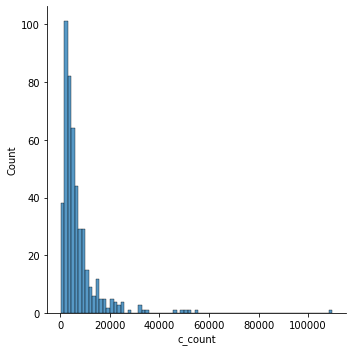

In [31]:
sns.displot(data = df_light,x='c_count')

### Bag of words

#### Preprocessor

In [32]:
import patat.util.text

In [33]:
importlib.reload(patat.util.text)
preprocessor = patat.util.text.get_latin
#preprocessor=None

#### Tokenizer

In [34]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from patat.ml.lex_analyser import LexAnalyser

lex = LexAnalyser()

def toklematize(text):
    tokens = lex.get_lemmas_from_text(text)
    return tokens   

tokenizer = toklematize
#tokenizer = word_tokenize
#tokenizer = lex.get_words

#### Mots rares

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
%%time
vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer)
count_matrix = vectorizer.fit_transform(df_light['text'])
count_array = count_matrix.toarray()
df_count = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_count.shape

CPU times: user 322 ms, sys: 12.7 ms, total: 335 ms
Wall time: 335 ms


(469, 24344)

In [218]:
%%time
occ_rares = 1
df_count_sum = pd.DataFrame(df_count.sum(),columns=['count'])

CPU times: user 15.8 ms, sys: 2.88 ms, total: 18.7 ms
Wall time: 18.2 ms


In [219]:
keep_words = df_count_sum[df_count_sum['count']>occ_rares].index
len(keep_words)

13157

In [220]:
rare_words = list(df_count_sum[df_count_sum['count']<=occ_rares].index)
len(rare_words)

11187

#### Mots Communs

In [221]:
df_words_0 = pd.DataFrame(df_count[df_light['infox']==0].sum(),columns=['count_0']).sort_values('count_0',ascending=False)
df_words_1 = pd.DataFrame(df_count[df_light['infox']==1].sum(),columns=['count_1']).sort_values('count_1',ascending=False)

In [222]:
common_size = 100
df_words_1 = df_words_1.head(common_size)
df_words_0 = df_words_0.head(common_size)

In [223]:
df_common = pd.merge(df_words_1,df_words_0,right_index=True,left_index=True)
df_common

,count_1,count_0
de,17980,10834
la,9901,6390
les,7804,4096
le,7554,4682
et,7287,4025
...,...,...
ukraine,355,236
leurs,349,185
aussi,341,339
premier,333,295


In [224]:
common_words = list(df_common.index)

In [225]:
ignore_words = common_words + rare_words

#### TfIdfVectorizer

In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [227]:
%%time
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer,stop_words=ignore_words)
count_matrix = vectorizer.fit_transform(df_light['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_tf.shape

/Users/fm/Desktop/Work/Patat/patat-env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'bouillir', 'breveter', 'bénir', 'croire', 'cuire', 'divertir', 'décombrer', 'démoraliser', 'déplaire', 'désordonner', 'joindre', 'matcher', 'mol', 'muqueux', 'oxygéner', 'pondérer', 'presser', 'précieux', 'rassasier', 'recroître', 'saisir', 'spécifier', 'subventionner', 'séduire', 'teindre', 'tracter'] not in stop_words.
  warnings.warn(


CPU times: user 319 ms, sys: 7.43 ms, total: 326 ms
Wall time: 326 ms


(469, 13070)

In [228]:
df_X = df_tf

In [229]:
len(df_X.keys())

13070

In [230]:
df_X

,aa,aaron,aatip,ab,abad,abandon,abandonner,abat,abattage,abattre,...,évêque,île,östlund,œil,œsophagien,œuf,œufs,œuvre,œuvres,œuvré
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.029640,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02427,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.014437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
465,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
466,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
467,0.070024,0.0,0.0,0.0,0.0,0.0,0.006041,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


### Logistic Regression

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [239]:
def train_test_logreg(X,y):
    results = {}
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,train_size=0.75)
    max_iter=500
    C=3000
    solver = 'lbfgs'
    classifier = LogisticRegression(C=C, random_state=42, solver=solver, max_iter=500)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(f'Classifier :\t{classifier}')
    print(f'Accuracy :\t{metrics.accuracy_score(y_test, y_pred)*100:.2f}')
    print(f'Recall :\t{metrics.recall_score(y_test, y_pred)*100:.2f}')
    


In [233]:
X=df_X
y=df_light['infox']

In [256]:
max_iter=500
C=0.4
solver = 'lbfgs'
random_state = 42
classifier = LogisticRegression(C=C, random_state=random_state, solver=solver, max_iter=max_iter)
cvm = cross_val_score(classifier, X, y, cv=5).mean()
print(f'Mean CV Score : {cvm*100:.2f}%')
print(cross_val_score(classifier, X, y, cv=5))

Mean CV Score : 74.40%
[0.77659574 0.76595745 0.82978723 0.65957447 0.68817204]


In [240]:
train_test_logreg(X,y)

Classifier :	LogisticRegression(C=3000, max_iter=500, random_state=42)
Accuracy :	77.97
Recall :	91.07


In [259]:
def crossval_test(X,y):
    results = {}

    penalties = ['l1','l2','elasticnet','none']
    solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
    
    max_iter=500
    C=0.5
    solver = 'lbfgs'
    random_state = 42
    cv=5
    for C in [0.5,0.6,0.7,0.8] :
        classifier = LogisticRegression(C=C, random_state=random_state, solver=solver, max_iter=max_iter)
        cvm = cross_val_score(classifier, X, y, cv=cv).mean()
        results[C]=cvm
    return results

In [260]:
crossval_test(X,y)

{0.5: 0.7482727064744911,
 0.6: 0.746145046900023,
 0.7: 0.7482727064744911,
 0.8: 0.7418668496911461}

### Gaussian Process Classifier

In [262]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [267]:
def crossval_test(X,y):
    results = {}
    random_state=42
    cv=5
    kernel = 1.0 * RBF(1.0)
    classifier = GaussianProcessClassifier(kernel=kernel,random_state=random_state)
    cvm = cross_val_score(classifier, X, y, cv=cv).mean()
    results[0]=cvm
    return results

In [268]:
crossval_test(X,y)

{0: 0.7355067490276825}

### Decision Tree, Random Forest, AdaBoost

In [272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [277]:
classifiers = [
    DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=15, n_estimators=10, max_features=1),
#    AdaBoostClassifier(),
]

In [278]:
for classifier in classifiers:
    cvm = cross_val_score(classifier, X, y, cv=5).mean()
    print(f'{classifier} : {cvm*100:.2f}%')

DecisionTreeClassifier(max_depth=15) : 59.26%
RandomForestClassifier(max_depth=15, max_features=1, n_estimators=10) : 56.29%
AdaBoostClassifier() : 60.32%


## Mesure et observation des résultats
---

## Sauvegarde des résultats
---

## Conclusions
---

- Résultat : OK

## Bricolages
---

In [ ]:
!pip3 install nltk

In [ ]:
df_light

In [ ]:
lex.get_lemma('oeufs')

In [ ]:
'œuf'.replace('œ','oe')